# The Battle of Neighborhoods in Tokyo

In [1]:
!conda install -c conda-forge geopy --yes 

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import pandas as pd # library for data analsysis

print('Libraries imported.')

Libraries imported.


In [3]:
data = pd.read_html("https://en.wikipedia.org/wiki/Special_wards_of_Tokyo#List_of_special_wards")
df = data[3]
df

,No.,Flag,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Major districts
0,01,NaN,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,NaN,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,NaN,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,NaN,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,NaN,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"
5,06,NaN,Taitō,台東区,200486,19830,10.11,"Ueno, Asakusa"
6,07,NaN,Sumida,墨田区,260358,18910,13.77,"Kinshichō, Morishita, Ryōgoku"
7,08,NaN,Kōtō,江東区,502579,12510,40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,..."
8,09,NaN,Shinagawa,品川区,392492,17180,22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,..."
9,10,NaN,Meguro,目黒区,280283,19110,14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai"


In [4]:
df1=df.drop('Flag', axis=1)
df1

,No.,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Major districts
0,01,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"
5,06,Taitō,台東区,200486,19830,10.11,"Ueno, Asakusa"
6,07,Sumida,墨田区,260358,18910,13.77,"Kinshichō, Morishita, Ryōgoku"
7,08,Kōtō,江東区,502579,12510,40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,..."
8,09,Shinagawa,品川区,392492,17180,22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,..."
9,10,Meguro,目黒区,280283,19110,14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai"


In [5]:
df2 = df1.dropna(axis=0,how='any')  
df2

,No.,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Major districts
0,01,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"
5,06,Taitō,台東区,200486,19830,10.11,"Ueno, Asakusa"
6,07,Sumida,墨田区,260358,18910,13.77,"Kinshichō, Morishita, Ryōgoku"
7,08,Kōtō,江東区,502579,12510,40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,..."
8,09,Shinagawa,品川区,392492,17180,22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,..."
9,10,Meguro,目黒区,280283,19110,14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai"


In [6]:
df3=df2.drop('Major districts', axis=1)
df3.rename(columns={ "Population(as of October 2016)":"Population","Density(/km2)":"Density","Area(km2)":"Area" }, inplace=True)
df3

,No.,Name,Kanji,Population(as of October 2016,Density,Area
0,01,Chiyoda,千代田区,59441,5100,11.66
1,02,Chūō,中央区,147620,14460,10.21
2,03,Minato,港区,248071,12180,20.37
3,04,Shinjuku,新宿区,339211,18620,18.22
4,05,Bunkyō,文京区,223389,19790,11.29
5,06,Taitō,台東区,200486,19830,10.11
6,07,Sumida,墨田区,260358,18910,13.77
7,08,Kōtō,江東区,502579,12510,40.16
8,09,Shinagawa,品川区,392492,17180,22.84
9,10,Meguro,目黒区,280283,19110,14.67


In [7]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Tokyo_explorer")

df3['Major_Dist_Coord']= df3['Kanji'].apply(geolocator.geocode).apply(lambda x:(x.latitude, x.longitude))
df3[['Latitude','Longitude']] = df3['Major_Dist_Coord'].apply(pd.Series)

df3.drop(['Major_Dist_Coord'], axis=1, inplace=True)
tokyo_data=df3
tokyo_data

,No.,Name,Kanji,Population(as of October 2016,Density,Area,Latitude,Longitude
0,01,Chiyoda,千代田区,59441,5100,11.66,35.693810,139.753216
1,02,Chūō,中央区,147620,14460,10.21,35.666255,139.775565
2,03,Minato,港区,248071,12180,20.37,35.643227,139.740055
3,04,Shinjuku,新宿区,339211,18620,18.22,35.693763,139.703632
4,05,Bunkyō,文京区,223389,19790,11.29,35.718810,139.744732
5,06,Taitō,台東区,200486,19830,10.11,35.717450,139.790859
6,07,Sumida,墨田区,260358,18910,13.77,35.700429,139.805017
7,08,Kōtō,江東区,502579,12510,40.16,35.649154,139.812790
8,09,Shinagawa,品川区,392492,17180,22.84,35.599252,139.738910
9,10,Meguro,目黒区,280283,19110,14.67,35.621250,139.688014


In [8]:
address = 'Tokyo'

geolocator = Nominatim(user_agent="Tokyo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tokyo City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tokyo City are 35.6828387, 139.7594549.


In [9]:
# create map of Toronto using latitude and longitude values
map_tokyo = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(tokyo_data['Latitude'], tokyo_data['Longitude'], tokyo_data['Kanji']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tokyo)  
    
map_tokyo

# Define Foursquare Credentials and Version

In [10]:
CLIENT_ID = 'CZLFHE3O5MTINUUGLMXCBOEXKMKYNX0J1VV3MLUS5S0TARSS' # your Foursquare ID
CLIENT_SECRET = 'JGF0UE02SMJWDNUHNWCWQNKPXKV5S1MQ2THL2CLZQP3QI0Q3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CZLFHE3O5MTINUUGLMXCBOEXKMKYNX0J1VV3MLUS5S0TARSS
CLIENT_SECRET:JGF0UE02SMJWDNUHNWCWQNKPXKV5S1MQ2THL2CLZQP3QI0Q3


In [12]:
tokyo_data.loc[0, 'Kanji']

'千代田区'

# Get the neighborhood's latitude and longitude values.

In [13]:
kanji_latitude = tokyo_data.loc[0, 'Latitude'] # neighborhood latitude value
kanji_longitude = tokyo_data.loc[0, 'Longitude'] # neighborhood longitude value

kanji_name = tokyo_data.loc[0, 'Kanji'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(kanji_name, 
                                                               kanji_latitude, 
                                                               kanji_longitude))

Latitude and longitude values of 千代田区 are 35.6938097, 139.7532163.


# Now, let's get the top 100 venues that are in 千代田区   within a radius of 500 meters. First, let's create the GET request URL. Name your URL url.


In [14]:
# type your answer here
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
     kanji_latitude, 
     kanji_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=CZLFHE3O5MTINUUGLMXCBOEXKMKYNX0J1VV3MLUS5S0TARSS&client_secret=JGF0UE02SMJWDNUHNWCWQNKPXKV5S1MQ2THL2CLZQP3QI0Q3&v=20180605&ll=35.6938097,139.7532163&radius=500&limit=100'

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f54aa04b5de2b6f48d45f1d'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Chiyoda',
  'headerFullLocation': 'Chiyoda, Tokyo',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 93,
  'suggestedBounds': {'ne': {'lat': 35.698309704500005,
    'lng': 139.758746831865},
   'sw': {'lat': 35.6893096955, 'lng': 139.74768576813497}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '581680a638fa2b62abcb3196',
       'name': 'Jimbocho Kurosu (神保町 黒須)',
       'location': {'address': '神田神保町3-1-19',
        'lat': 35.695538943400116,
        'lng': 139.75485123601928,
        'labeledLatLngs': [{'label': 'display',
          'lat': 35.6955389

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\mingzhu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Jimbocho Kurosu (神保町 黒須),Ramen Restaurant,35.695539,139.754851
1,Kanda Tendonya (神田天丼家),Tempura Restaurant,35.695765,139.754682
2,Kitanomaru Park (北の丸公園),Park,35.691653,139.751201
3,Nippon Budokan (日本武道館),Stadium,35.693356,139.749865
4,Mori no Butchers (森のブッチャーズ),Gastropub,35.694770,139.755980


In [18]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

93 venues were returned by Foursquare.


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['kanji', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
# type your answer here
tokyo_venues = getNearbyVenues(names=tokyo_data['Kanji'],
                                   latitudes=tokyo_data['Latitude'],
                                   longitudes=tokyo_data['Longitude']
                                  )

千代田区
中央区
港区
新宿区
文京区
台東区
墨田区
江東区
品川区
目黒区
大田区
世田谷区
渋谷区
中野区
杉並区
豊島区
北区
荒川区
板橋区
練馬区
足立区
葛飾区
江戸川区


In [21]:
print(tokyo_venues.shape)
tokyo_venues.head()

(1029, 7)


,kanji,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,千代田区,35.69381,139.753216,Jimbocho Kurosu (神保町 黒須),35.695539,139.754851,Ramen Restaurant
1,千代田区,35.69381,139.753216,Kanda Tendonya (神田天丼家),35.695765,139.754682,Tempura Restaurant
2,千代田区,35.69381,139.753216,Kitanomaru Park (北の丸公園),35.691653,139.751201,Park
3,千代田区,35.69381,139.753216,Nippon Budokan (日本武道館),35.693356,139.749865,Stadium
4,千代田区,35.69381,139.753216,Mori no Butchers (森のブッチャーズ),35.694770,139.755980,Gastropub


In [22]:
tokyo_venues.groupby('kanji').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
kanji,,,,,,
世田谷区,38,38,38,38,38,38
中央区,88,88,88,88,88,88
中野区,31,31,31,31,31,31
北区,54,54,54,54,54,54
千代田区,93,93,93,93,93,93
台東区,86,86,86,86,86,86
品川区,29,29,29,29,29,29
墨田区,35,35,35,35,35,35
大田区,75,75,75,75,75,75


In [23]:
print('There are {} uniques categories.'.format(len(tokyo_venues['Venue Category'].unique())))

There are 182 uniques categories.


In [24]:
print(tokyo_venues['Venue Category'].value_counts()[0:10])

Convenience Store      90
Ramen Restaurant       55
Café                   43
Japanese Restaurant    43
Chinese Restaurant     40
Sake Bar               40
Park                   33
BBQ Joint              31
Sushi Restaurant       30
Coffee Shop            25
Name: Venue Category, dtype: int64


In [53]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Tokyo_Venues_only_restaurant = tokyo_venues[tokyo_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Tokyo_Venues_only_restaurant.index = np.arange(1, len(Tokyo_Venues_only_restaurant )+1)

In [54]:
# create a dataframe of top 10 categories
Tokyo_5_Dist_Venues_Top10 = Tokyo_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Tokyo_5_Dist_Venues_Top10=Tokyo_5_Dist_Venues_Top10.reset_index()
#Tokyo_5_Dist_Venues_Top10

Tokyo_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Tokyo_5_Dist_Venues_Top10



,Venue_Category,Frequency
0,Ramen Restaurant,55
1,Japanese Restaurant,43
2,Chinese Restaurant,40
3,Sushi Restaurant,30
4,Italian Restaurant,20
5,Soba Restaurant,18
6,Tonkatsu Restaurant,11
7,Donburi Restaurant,10
8,Indian Restaurant,8
9,Yakitori Restaurant,7


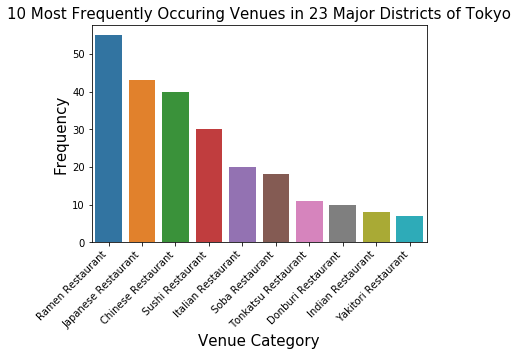

<Figure size 1296x504 with 0 Axes>

In [55]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Tokyo_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in 23 Major Districts of Tokyo', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

# Analyze Each Neighborhood

In [25]:
# one hot encoding
tokyo_onehot = pd.get_dummies(tokyo_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tokyo_onehot['kanji'] = tokyo_venues['kanji'] 

# move neighborhood column to the first column
fixed_columns = [tokyo_onehot.columns[-1]] + list(tokyo_onehot.columns[:-1])
tokyo_onehot = tokyo_onehot[fixed_columns]

tokyo_onehot.head()

,kanji,ATM,Accessories Store,African Restaurant,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Baseball Field,Bath House,Bed & Breakfast,Beer Bar,Bike Rental / Bike Share,Bistro,Bookstore,Botanical Garden,Bowling Alley,Brazilian Restaurant,Bridge,Buffet,Burger Joint,Bus Stop,Café,Canal,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donburi Restaurant,Dongbei Restaurant,Drugstore,Dumpling Restaurant,Electronics Store,Event Space,Fabric Shop,Fast Food Restaurant,Fishing Store,Flea Market,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Inn,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Family Restaurant,Japanese Restaurant,Jazz Club,Kaiseki Restaurant,Karaoke Box,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Leather Goods Store,Library,Liquor Store,Market,Martial Arts School,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Monjayaki Restaurant,Monument / Landmark,Motel,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nabe Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Outdoor Sculpture,Park,Pastry Shop,Pet Café,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rest Area,Restaurant,River,Road,Rock Club,Rugby Pitch,Russian Restaurant,Sake Bar,Sandwich Place,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stadium,Stationery Store,Steakhouse,Strip Club,Sukiyaki Restaurant,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Takoyaki Place,Tea Room,Teishoku Restaurant,Tempura Restaurant,Thai Restaurant,Theater,Theme Park,Toll Booth,Tonkatsu Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Udon Restaurant,Unagi Restaurant,Used Bookstore,Vietnamese Restaurant,Wagashi Place,Waterfall,Wine Bar,Wine Shop,Yakitori Restaurant,Yoshoku Restaurant
0,千代田区,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,千代田区,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,千代田区,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,千代田区,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,千代田

In [26]:
tokyo_onehot.shape

(1029, 183)

In [27]:
tokyo_grouped = tokyo_onehot.groupby('kanji').mean().reset_index()
tokyo_grouped

,kanji,ATM,Accessories Store,African Restaurant,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Baseball Field,Bath House,Bed & Breakfast,Beer Bar,Bike Rental / Bike Share,Bistro,Bookstore,Botanical Garden,Bowling Alley,Brazilian Restaurant,Bridge,Buffet,Burger Joint,Bus Stop,Café,Canal,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donburi Restaurant,Dongbei Restaurant,Drugstore,Dumpling Restaurant,Electronics Store,Event Space,Fabric Shop,Fast Food Restaurant,Fishing Store,Flea Market,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Inn,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Family Restaurant,Japanese Restaurant,Jazz Club,Kaiseki Restaurant,Karaoke Box,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Leather Goods Store,Library,Liquor Store,Market,Martial Arts School,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Monjayaki Restaurant,Monument / Landmark,Motel,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nabe Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Outdoor Sculpture,Park,Pastry Shop,Pet Café,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rest Area,Restaurant,River,Road,Rock Club,Rugby Pitch,Russian Restaurant,Sake Bar,Sandwich Place,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stadium,Stationery Store,Steakhouse,Strip Club,Sukiyaki Restaurant,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Takoyaki Place,Tea Room,Teishoku Restaurant,Tempura Restaurant,Thai Restaurant,Theater,Theme Park,Toll Booth,Tonkatsu Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Udon Restaurant,Unagi Restaurant,Used Bookstore,Vietnamese Restaurant,Wagashi Place,Waterfall,Wine Bar,Wine Shop,Yakitori Restaurant,Yoshoku Restaurant
0,世田谷区,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.026316,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.026316,0.078947,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.026316,0.184211,0.00,0.026316,0.000000,0.00,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.00,0.000000,0.00,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.026316,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.026316,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.026316,0.026316,0.00,0.00,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.052632,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.026316,0.000000,0.026316,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.026316,0.026316,0.000000,0.000000,0.0000

In [28]:
tokyo_grouped.shape

(23, 183)

In [94]:
num_top_venues = 5

for hood in tokyo_grouped['kanji']:
    print("----"+hood+"----")
    temp = tokyo_grouped[tokyo_grouped['kanji'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----世田谷区----
               venue  freq
0  Convenience Store  0.18
1             Bakery  0.08
2               Café  0.08
3   Ramen Restaurant  0.05
4       Tram Station  0.05


----中央区----
                 venue  freq
0     Sushi Restaurant  0.22
1  Japanese Restaurant  0.14
2                 Park  0.06
3    Convenience Store  0.04
4          Coffee Shop  0.04


----中野区----
                venue  freq
0   Convenience Store  0.09
1            Sake Bar  0.09
2    Ramen Restaurant  0.06
3                Park  0.06
4  Chinese Restaurant  0.06


----北区----
               venue  freq
0  Convenience Store  0.16
1   Ramen Restaurant  0.10
2           Sake Bar  0.06
3            Theater  0.04
4               Café  0.04


----千代田区----
                venue  freq
0   Convenience Store  0.07
1         Coffee Shop  0.07
2                Café  0.07
3    Ramen Restaurant  0.07
4  Chinese Restaurant  0.07


----台東区----
               venue  freq
0        Coffee Shop  0.07
1  Convenience Store  0.06
2 

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['kanji']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['kanji'] = tokyo_grouped['kanji']

for ind in np.arange(tokyo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tokyo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,kanji,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,世田谷区,Convenience Store,Café,Sake Bar,Bakery,Tram Station,Ramen Restaurant,Diner,Park,Outdoor Sculpture,Cupcake Shop
1,中央区,Sushi Restaurant,Japanese Restaurant,Park,Coffee Shop,Convenience Store,Bakery,Italian Restaurant,Soba Restaurant,Seafood Restaurant,Tea Room
2,中野区,Convenience Store,Ramen Restaurant,Café,Italian Restaurant,Grocery Store,Noodle House,Park,Donburi Restaurant,Chinese Restaurant,Coffee Shop
3,北区,Convenience Store,Ramen Restaurant,Sake Bar,BBQ Joint,Grocery Store,Theater,Café,Drugstore,Japanese Restaurant,Donburi Restaurant
4,千代田区,Chinese Restaurant,Café,Convenience Store,Coffee Shop,Ramen Restaurant,Sake Bar,Historic Site,Japanese Curry Restaurant,Art Museum,French Restaurant


In [31]:
# set number of clusters
kclusters = 5

tokyo_grouped_clustering = tokyo_grouped.drop('kanji', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 3])

In [32]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tokyo_merged = tokyo_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tokyo_merged = tokyo_merged.join(neighborhoods_venues_sorted.set_index('kanji'), on='Kanji')

tokyo_merged.head() # check the last columns!


,No.,Name,Kanji,Population(as of October 2016,Density,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,01,Chiyoda,千代田区,59441,5100,11.66,35.693810,139.753216,0,Chinese Restaurant,Café,Convenience Store,Coffee Shop,Ramen Restaurant,Sake Bar,Historic Site,Japanese Curry Restaurant,Art Museum,French Restaurant
1,02,Chūō,中央区,147620,14460,10.21,35.666255,139.775565,0,Sushi Restaurant,Japanese Restaurant,Park,Coffee Shop,Convenience Store,Bakery,Italian Restaurant,Soba Restaurant,Seafood Restaurant,Tea Room
2,03,Minato,港区,248071,12180,20.37,35.643227,139.740055,1,Convenience Store,Soba Restaurant,Park,Kosher Restaurant,Grocery Store,Discount Store,Kaiseki Restaurant,Drugstore,French Restaurant,Hardware Store
3,04,Shinjuku,新宿区,339211,18620,18.22,35.693763,139.703632,0,Sake Bar,Ramen Restaurant,Bar,BBQ Joint,Japanese Restaurant,Rock Club,Pub,Tonkatsu Restaurant,Pet Store,Thai Restaurant
4,05,Bunkyō,文京区,223389,19790,11.29,35.718810,139.744732,3,Szechuan Restaurant,Convenience Store,Steakhouse,Café,Road,Bus Stop,Grocery Store,Park,Museum,Botanical Garden


In [33]:
tokyo_merged

,No.,Name,Kanji,Population(as of October 2016,Density,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,01,Chiyoda,千代田区,59441,5100,11.66,35.693810,139.753216,0,Chinese Restaurant,Café,Convenience Store,Coffee Shop,Ramen Restaurant,Sake Bar,Historic Site,Japanese Curry Restaurant,Art Museum,French Restaurant
1,02,Chūō,中央区,147620,14460,10.21,35.666255,139.775565,0,Sushi Restaurant,Japanese Restaurant,Park,Coffee Shop,Convenience Store,Bakery,Italian Restaurant,Soba Restaurant,Seafood Restaurant,Tea Room
2,03,Minato,港区,248071,12180,20.37,35.643227,139.740055,1,Convenience Store,Soba Restaurant,Park,Kosher Restaurant,Grocery Store,Discount Store,Kaiseki Restaurant,Drugstore,French Restaurant,Hardware Store
3,04,Shinjuku,新宿区,339211,18620,18.22,35.693763,139.703632,0,Sake Bar,Ramen Restaurant,Bar,BBQ Joint,Japanese Restaurant,Rock Club,Pub,Tonkatsu Restaurant,Pet Store,Thai Restaurant
4,05,Bunkyō,文京区,223389,19790,11.29,35.718810,139.744732,3,Szechuan Restaurant,Convenience Store,Steakhouse,Café,Road,Bus Stop,Grocery Store,Park,Museum,Botanical Garden
5,06,Taitō,台東区,200486,19830,10.11,35.717450,139.790859,0,Coffee Shop,Convenience Store,Hostel,BBQ Joint,Hotel,Sushi Restaurant,Café,Wagashi Place,Chinese Restaurant,Japanese Restaurant
6,07,Sumida,墨田区,260358,18910,13.77,35.700429,139.805017,1,Convenience Store,Chinese Restaurant,Japanese Restaurant,BBQ Joint,Sake Bar,Café,Bus Stop,Supermarket,Unagi Restaurant,Martial Arts School
7,08,Kōtō,江東区,502579,12510,40.16,35.649154,139.812790,2,Intersection,Bus Stop,Convenience Store,Park,Metro Station,Chinese Restaurant,Dog Run,Supermarket,Platform,Plaza
8,09,Shinagawa,品川区,392492,17180,22.84,35.599252,139.738910,1,Convenience Store,BBQ Joint,Canal,Bus Stop,Grocery Store,Japanese Restaurant,Toll Booth,Donburi Restaurant,Flea Market,Playground
9,10,Meguro,目黒区,280283,19110,14.67,35.621250,139.688014,4,Convenience Store,Chinese Restaurant,Japanese Restaurant,Coffee Shop,Bus Stop,Grocery Store,Dessert Shop,Park,Sports Club,Noodle House


In [34]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_merged['Latitude'], tokyo_merged['Longitude'], tokyo_merged['Kanji'], tokyo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine Clusters

### Cluster1

In [36]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 0, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Name,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chiyoda,11.66,35.693810,139.753216,0,Chinese Restaurant,Café,Convenience Store,Coffee Shop,Ramen Restaurant,Sake Bar,Historic Site,Japanese Curry Restaurant,Art Museum,French Restaurant
1,Chūō,10.21,35.666255,139.775565,0,Sushi Restaurant,Japanese Restaurant,Park,Coffee Shop,Convenience Store,Bakery,Italian Restaurant,Soba Restaurant,Seafood Restaurant,Tea Room
3,Shinjuku,18.22,35.693763,139.703632,0,Sake Bar,Ramen Restaurant,Bar,BBQ Joint,Japanese Restaurant,Rock Club,Pub,Tonkatsu Restaurant,Pet Store,Thai Restaurant
5,Taitō,10.11,35.717450,139.790859,0,Coffee Shop,Convenience Store,Hostel,BBQ Joint,Hotel,Sushi Restaurant,Café,Wagashi Place,Chinese Restaurant,Japanese Restaurant
10,Ōta,60.66,35.561206,139.715843,0,Ramen Restaurant,Sake Bar,Japanese Restaurant,Chinese Restaurant,Bed & Breakfast,Tonkatsu Restaurant,Café,Sushi Restaurant,Yoshoku Restaurant,Yakitori Restaurant
12,Shibuya,15.11,35.664596,139.698711,0,Café,Record Shop,Nightclub,Rock Club,Japanese Restaurant,Ramen Restaurant,Sake Bar,Concert Hall,Chinese Restaurant,Clothing Store
13,Nakano,15.59,35.718123,139.664468,0,Convenience Store,Ramen Restaurant,Café,Italian Restaurant,Grocery Store,Noodle House,Park,Donburi Restaurant,Chinese Restaurant,Coffee Shop
14,Suginami,34.06,35.699493,139.636288,0,Ramen Restaurant,Grocery Store,Sake Bar,Café,Soba Restaurant,Italian Restaurant,Shabu-Shabu Restaurant,Shopping Mall,Park,Gym / Fitness Center
15,Toshima,13.01,35.736156,139.714222,0,Ramen Restaurant,Chinese Restaurant,Convenience Store,Soba Restaurant,Music Store,Recording Studio,Steakhouse,Seafood Restaurant,Sake Bar,Rock Club
16,Kita,20.61,35.755838,139.736687,0,Convenience Store,Ramen Restaurant,Sake Bar,BBQ Joint,Grocery Store,Theater,Café,Drugstore,Japanese Restaurant,Donburi Restaurant


### Cluster2

In [37]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 1, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Name,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Minato,20.37,35.643227,139.740055,1,Convenience Store,Soba Restaurant,Park,Kosher Restaurant,Grocery Store,Discount Store,Kaiseki Restaurant,Drugstore,French Restaurant,Hardware Store
6,Sumida,13.77,35.700429,139.805017,1,Convenience Store,Chinese Restaurant,Japanese Restaurant,BBQ Joint,Sake Bar,Café,Bus Stop,Supermarket,Unagi Restaurant,Martial Arts School
8,Shinagawa,22.84,35.599252,139.738910,1,Convenience Store,BBQ Joint,Canal,Bus Stop,Grocery Store,Japanese Restaurant,Toll Booth,Donburi Restaurant,Flea Market,Playground
11,Setagaya,58.05,35.646096,139.656270,1,Convenience Store,Café,Sake Bar,Bakery,Tram Station,Ramen Restaurant,Diner,Park,Outdoor Sculpture,Cupcake Shop
18,Itabashi,32.22,35.774143,139.681209,1,Convenience Store,Park,Sake Bar,Toll Booth,Rest Area,Shoe Store,Chinese Restaurant,Grocery Store,Supermarket,Hobby Shop
20,Adachi,53.25,35.783703,139.795319,1,Convenience Store,Drugstore,Supermarket,Japanese Restaurant,Japanese Family Restaurant,Italian Restaurant,Discount Store,Pharmacy,Park,Gift Shop
21,Katsushika,34.80,35.751733,139.863816,1,Convenience Store,Train Station,ATM,Coffee Shop,Donburi Restaurant,Park,Supermarket,Motel,Ramen Restaurant,Pharmacy
22,Edogawa,49.90,35.678278,139.871091,1,Convenience Store,Grocery Store,River,Clothing Store,Italian Restaurant,Bakery,Ramen Restaurant,Bath House,Supermarket,Playground


### Cluster3

In [38]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 2, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Name,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Kōtō,40.16,35.649154,139.812790,2,Intersection,Bus Stop,Convenience Store,Park,Metro Station,Chinese Restaurant,Dog Run,Supermarket,Platform,Plaza
19,Nerima,48.08,35.748360,139.638735,2,Convenience Store,Café,Metro Station,Intersection,Supermarket,Bus Stop,Park,Pharmacy,Bike Rental / Bike Share,Discount Store


### Cluster4

In [39]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 3, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Name,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Bunkyō,11.29,35.71881,139.744732,3,Szechuan Restaurant,Convenience Store,Steakhouse,Café,Road,Bus Stop,Grocery Store,Park,Museum,Botanical Garden


### Cluster5

In [40]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 4, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Name,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Meguro,14.67,35.621250,139.688014,4,Convenience Store,Chinese Restaurant,Japanese Restaurant,Coffee Shop,Bus Stop,Grocery Store,Dessert Shop,Park,Sports Club,Noodle House
17,Arakawa,10.16,35.737529,139.781310,4,Park,Convenience Store,Chinese Restaurant,Grocery Store,Intersection,Ramen Restaurant,Bus Stop,Asian Restaurant,Dessert Shop,Noodle House
